In [1]:
import pandas as pd
# import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
# from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
# urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x24ccc401ef0>)

In [21]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [6]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 150000


In [1]:
from konlpy.tag import Okt

In [2]:
okt = Okt()

## 중복된 데이터 개수 확인

In [7]:
train_data['document'].nunique(), train_data['label'].nunique() 

(146182, 2)

## 중복된 데이터 삭제

In [8]:
train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [9]:
train_data # 삭제된걸 볼 수 있다

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


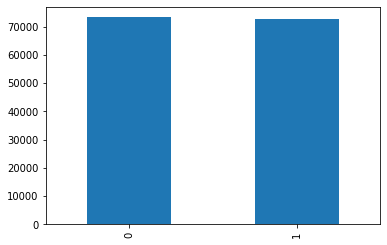

In [11]:
train_data['label'].value_counts().plot(kind = 'bar') # 비율 비슷

## 중복제거 했으므로, null값 찾기

In [12]:
print(train_data.isnull().values.any()) # 이게 true가 나오면 결측치 있음

True


In [13]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [14]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [15]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) 

False


In [16]:
train_data[:5] # 불필요한 특수문자를 제거해보자

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [17]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [18]:
train_data['document'].replace('', np.nan, inplace=True) # 한글만 찾는건데, 빈 값은 nan으로 바꿔주고
print(train_data.isnull().sum()) # nan인거의 개수 찾기

id            0
document    391
label         0
dtype: int64


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
# 지우기
train_data = train_data.dropna(how = 'any')
print(len(train_data))

145791


---------------------아래가 홈페이지----------------------

In [11]:
import pandas as pd
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [12]:
from konlpy.tag import Okt
okt = Okt()

In [13]:
def tokenize(sentence):
    okt = Okt()
    tokenized_sentence = []

    for line in sentence:
        result = []
        temp_sentence = okt.pos(line, norm=True, stem=True)
        print(temp_sentence)
        for i in temp_sentence:                             
            if (i[1] == 'Noun' or i[1] == 'Adjective' or i[1] == 'Alpha'):                  
                result.append(i[0])
            
        tokenized_sentence.append(result)

    return tokenized_sentence

In [14]:
sentences = train_data['document'].tolist()

In [15]:
from konlpy.tag import Okt

okt = Okt()

In [17]:
toke = tokenize(sentences[:10])

[('아', 'Exclamation'), ('더빙', 'Noun'), ('..', 'Punctuation'), ('진짜', 'Noun'), ('짜증나다', 'Adjective'), ('목소리', 'Noun')]
[('흠', 'Noun'), ('...', 'Punctuation'), ('포스터', 'Noun'), ('보고', 'Noun'), ('초딩', 'Noun'), ('영화', 'Noun'), ('줄', 'Noun'), ('....', 'Punctuation'), ('오버', 'Noun'), ('연기', 'Noun'), ('조차', 'Josa'), ('가볍다', 'Adjective'), ('않다', 'Verb')]
[('너', 'Modifier'), ('무재', 'Noun'), ('밓었', 'Noun'), ('다그', 'Noun'), ('래서', 'Noun'), ('보다', 'Verb'), ('추천', 'Noun'), ('한', 'Josa'), ('다', 'Adverb')]
[('교도소', 'Noun'), ('이야기', 'Noun'), ('구먼', 'Noun'), ('..', 'Punctuation'), ('솔직하다', 'Adjective'), ('재미', 'Noun'), ('는', 'Josa'), ('없다', 'Adjective'), ('..', 'Punctuation'), ('평점', 'Noun'), ('조정', 'Noun')]
[('사이', 'Modifier'), ('몬페', 'Noun'), ('그', 'Determiner'), ('의', 'Noun'), ('익살스럽다', 'Adjective'), ('연기', 'Noun'), ('가', 'Josa'), ('돋보이다', 'Verb'), ('영화', 'Noun'), ('!', 'Punctuation'), ('스파이더맨', 'Noun'), ('에서', 'Josa'), ('늙다', 'Verb'), ('보이다', 'Verb'), ('하다', 'Verb'), ('커스틴', 'Noun'), ('던스트', 'Noun'

In [18]:
toke

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '가볍다'],
 ['무재', '밓었', '다그', '래서', '추천'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'],
 ['몬페', '의', '익살스럽다', '연기', '영화', '스파이더맨', '커스틴', '던스트', '이쁘다'],
 ['막', '걸음', '마', '세', '초등학교', '학년', '생인', '영화', '반개', '아깝다', '움'],
 ['원작', '긴장감', '제대로'],
 ['별',
  '반개',
  '아깝다',
  '욕',
  '이응경',
  '길용우',
  '생활',
  '년',
  '정말',
  '발',
  '해도',
  '그것',
  '납치',
  '감금',
  '반복',
  '반복',
  '드라마',
  '가족',
  '없다',
  '연기',
  '사람',
  '네'],
 ['액션', '없다', '재미', '있다', '몇', '안되다', '영화'],
 ['왜', '평점', '낮다', '꽤', '볼', '데', '헐리우드', '화려하다', '있다']]

In [19]:
import tensorflow as tf
from tensorflow import keras

In [23]:
data = tokenize(sentences[:10])
datas = []
for i, date in enumerate(data):
    datas.append([date, i])


[('아', 'Exclamation'), ('더빙', 'Noun'), ('..', 'Punctuation'), ('진짜', 'Noun'), ('짜증나다', 'Adjective'), ('목소리', 'Noun')]
[('흠', 'Noun'), ('...', 'Punctuation'), ('포스터', 'Noun'), ('보고', 'Noun'), ('초딩', 'Noun'), ('영화', 'Noun'), ('줄', 'Noun'), ('....', 'Punctuation'), ('오버', 'Noun'), ('연기', 'Noun'), ('조차', 'Josa'), ('가볍다', 'Adjective'), ('않다', 'Verb')]
[('너', 'Modifier'), ('무재', 'Noun'), ('밓었', 'Noun'), ('다그', 'Noun'), ('래서', 'Noun'), ('보다', 'Verb'), ('추천', 'Noun'), ('한', 'Josa'), ('다', 'Adverb')]
[('교도소', 'Noun'), ('이야기', 'Noun'), ('구먼', 'Noun'), ('..', 'Punctuation'), ('솔직하다', 'Adjective'), ('재미', 'Noun'), ('는', 'Josa'), ('없다', 'Adjective'), ('..', 'Punctuation'), ('평점', 'Noun'), ('조정', 'Noun')]
[('사이', 'Modifier'), ('몬페', 'Noun'), ('그', 'Determiner'), ('의', 'Noun'), ('익살스럽다', 'Adjective'), ('연기', 'Noun'), ('가', 'Josa'), ('돋보이다', 'Verb'), ('영화', 'Noun'), ('!', 'Punctuation'), ('스파이더맨', 'Noun'), ('에서', 'Josa'), ('늙다', 'Verb'), ('보이다', 'Verb'), ('하다', 'Verb'), ('커스틴', 'Noun'), ('던스트', 'Noun'

In [35]:
datas[0]

[['더빙', '진짜', '짜증나다', '목소리'], 0]

In [25]:
model_type = "CNN-static"

In [26]:
if model_type in ["CNN-non-static", "CNN-static"]:
    embedding_weights = train_word2vec(np.vstack((x_train, x_test)), vocabulary_inv, num_features=embedding_dim,
                                       min_word_count=min_word_count, context=context)
    if model_type == "CNN-static":
        x_train = np.stack([np.stack([embedding_weights[word] for word in sentence]) for sentence in x_train])
        x_test = np.stack([np.stack([embeddi
                                     ng_weights[word] for word in sentence]) for sentence in x_test])

elif model_type == "CNN-rand":
    embedding_weights = None

if model_type == "CNN-static":
    input_shape = (sequence_length, embedding_dim)
else:
    input_shape = (sequence_length,)

model_input = keras.layers.Input(shape=input_shape)

# Static model does not have embedding layer
if model_type == "CNN-static":
    z = model_input
else:
    z = keras.layers.Embedding(len(vocabulary_inv), embedding_dim, input_length=sequence_length, name="embedding")(model_input)

z = keras.layers.Dropout(dropout)(z)

# Convolutional block
conv_blocks = []
for sz in filter_sizes:
    conv = keras.layers.Conv1D(filters=num_filters,
                         kernel_size=sz,
                         padding="valid",
                         activation="relu",
                         strides=1)(z)
    conv = keras.layers.MaxPooling1D(pool_size=2)(conv)
    conv = keras.layers.Flatten()(conv)
    conv_blocks.append(conv)
z = keras.layers.Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]

z = keras.layers.Dropout(dropout)(z)
z = keras.layers.Dense(hidden_dims, activation="relu")(z)
model_output = keras.layers.Dense(1, activation="sigmoid")(z)

NameError: name 'train_word2vec' is not defined

In [27]:
from tensorflow.keras.layers import Embedding


In [31]:
Embedding(['a', 'b', 'c'], 2)

TypeError: '<=' not supported between instances of 'list' and 'int'

In [33]:
Embedding(1000,64)